# Trial

try different test and train ration 5 to 50 percent 
find depth of trees 
reevaluate the drip lines 
no scaling N and Z as features. \n
how does score change according to training and testing splitting 


Essential libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Making arrays of N, Z, A and y the binding Energies

In [3]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)



# Initial Plots of N, Z, A to Binding Energies

Binding Energies against Number of Protons

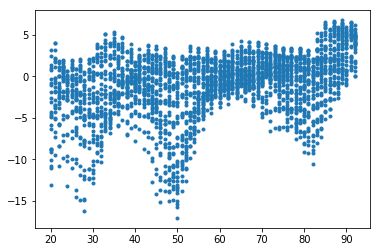

In [4]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Neutrons

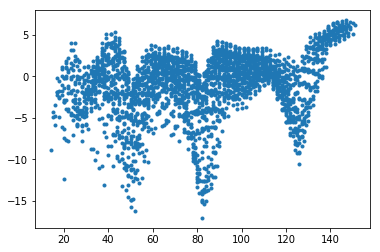

In [5]:
plt.plot(N,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Atomic Number

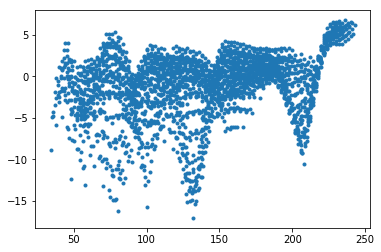

In [6]:
plt.plot(A,y,'o',markersize=3)
plt.show()

N vs Z with Binding Energies indicated in color

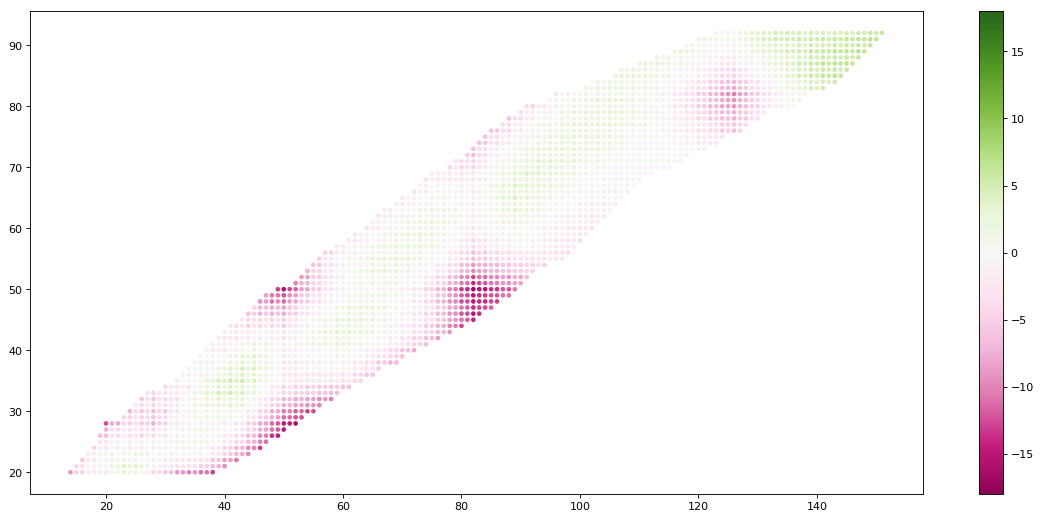

In [7]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

Splitting test data set into train and test est

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


# Making rf the Random Forest object

Using Scaling innitially

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);


In [13]:
predictions=rf.predict(Xs_train)
errors = predictions-y_train
print('Without Magic Numbers as Features')
print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for test data:', round(np.median(errors), 5), '\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)



#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(Xs_train, y_train)
testscore1=rf.score(Xs_test, y_test)

print('The coefficient of determination for training: ', round(trainscore1,5))
print('The coefficient of determination for testing: ', round(testscore1,5))



Without Magic Numbers as Features
Mean Absolute Error for train data: 0.00422
Median Absolute Error for train data: -0.03761 

Mean Absolute Error for test data: 0.62472
Median Absolute Error for test data: 0.55956 


The coefficient of determination for training:  0.99445
The coefficient of determination for testing:  0.96028


# Feature Importance for N and Z

In [14]:
#Paramater Weight 
print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')


N: 0.5579630660979011
Z: 0.44203693390209914 



# Graphing

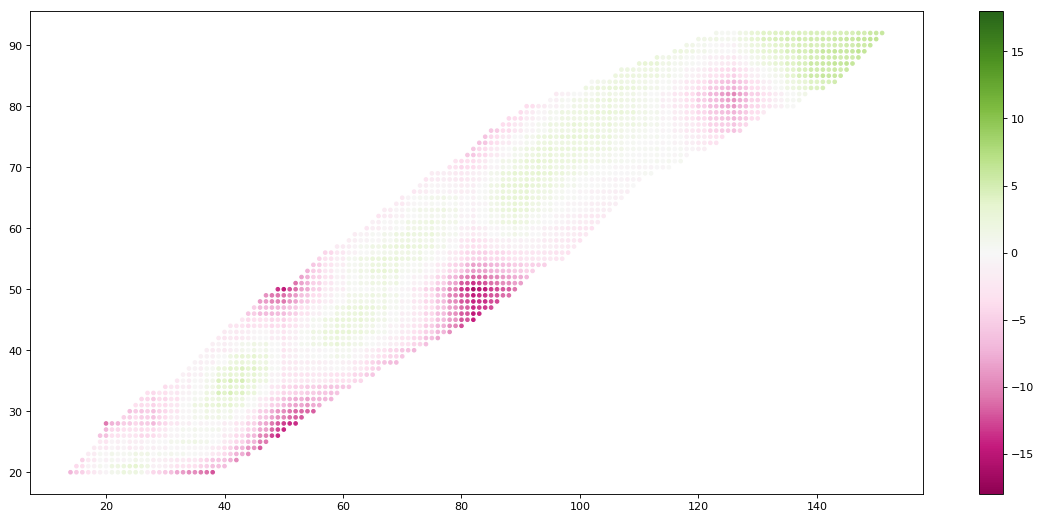

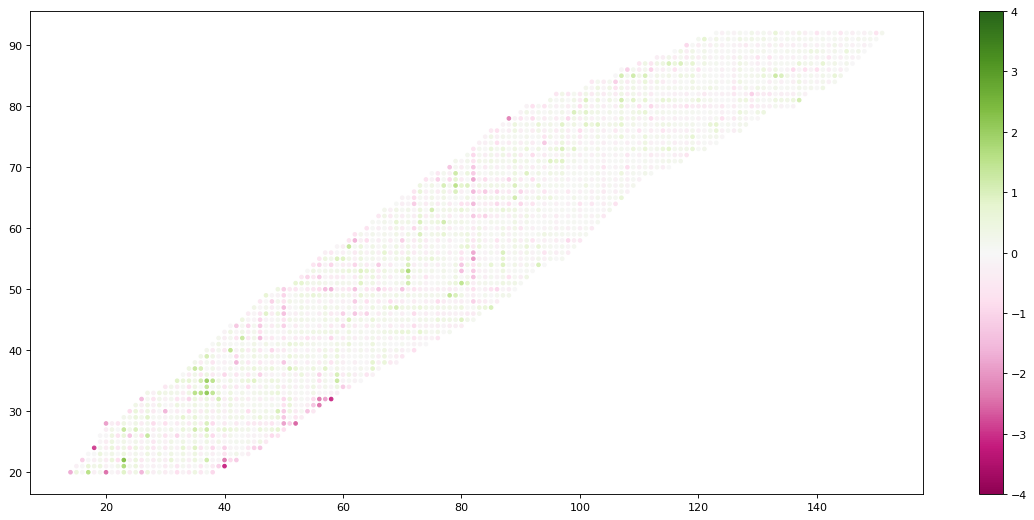

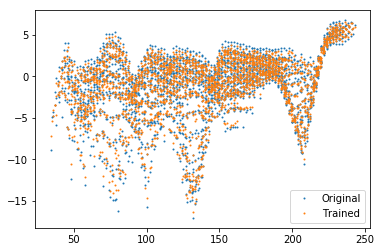

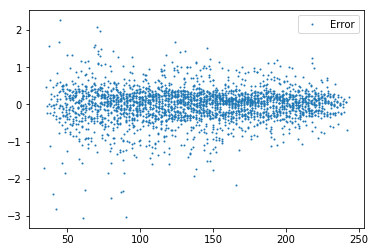

In [15]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 


fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=1,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=1,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()


# adding magic numbers as a feature




In [16]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [ ]:
# Instantiate model 
rf.fit(Xs_train, y_train);

In [ ]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Median Absolute Error for Xs_train data:', Emedtrain1, '\n')

print('Mean Absolute Error for Xs_test data:', Etest1)
print('Median Absolute Error for Xs_test data:', Emedtest1, '\n')

print('Mean Error difference between test and train data: ', round(Etest1-Etrain1, 5) )
print('Median Error difference  between test and train data: ', round(Emedtest1-Emedtrain1, 5), "\n\n\n")


predictions=rf.predict(Xs_train)
errors = abs(predictions- y_train)
Etrain2=np.mean(errors)
Emedtrain2=np.median(errors)

predictions=rf.predict(Xs_test)
errors = abs(predictions - y_test)
Etest2=np.mean(errors)
Emedtest2=np.median(errors)


print('With magic numbers as a feature:')

print('Mean Absolute Error for Xs_train data', Etrain2 )
print('Median Absolute Error for Xs_train data', Emedtrain2, '\n')

print('Mean Absolute Error for Xs_test data:', Etest2)
print('Median Absolute Error for Xs_test data:', Emedtest2, '\n')

print('Mean Error difference between test and train data: ', Etest2-Etrain2)
print('Median Error difference between test and train data: ', Emedtest2-Emedtrain2, '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

imprmedtest=Emedtest2-Emedtest1
imprmedtrain=Emedtrain2-Emedtrain1


print('===================================================')
print('difference between the mean train error of with and without added features:', imprtrain)
print('difference between the mean test error of with and without added features', imprtest, '\n')

print('difference between the median train error of with and without added features', imprmedtrain)
print('difference between the median test error of with and without added features', imprmedtest)
print('===================================================', '\n\n\n')

trainscore2=rf.score(Xs_train, y_train)
testscore2=rf.score(Xs_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('difference between the train score of with and without added features:', imprtrainscore)
print('difference between the test score of with and without added features', imprtestscore)
print('===================================================', '\n\n\n')



# Feature Importance

In [ ]:

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


# Graphing

In [ ]:
#Have to refit rf with all of X and y 
#Unlike with scaling

Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 

fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

#plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()




# Random Forest without Scaling 

Innitially without magic Numbers as Features.

In [ ]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [ ]:
# Instantiate model 
rf.fit(X_train, y_train);


In [ ]:
predictions=rf.predict(X_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for test data:', round(np.median(errors), 5),  '\n\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(X_train, y_train)
testscore1=rf.score(X_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


In [ ]:
#Feature Importance

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')



In [ ]:

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()



# adding magic numbers as a feature

still without scaling


In [ ]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [ ]:
# Instantiate model 
rf.fit(X_train, y_train);

In [ ]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', round(Etrain1,5))
print('Median Absolute Error for Xs_train data:', round(Emedtrain1, 5), "\n")

print('Mean Absolute Error for Xs_test data:', round(Etest1,5))
print('Median Absolute Error for Xs_test data:', round(Emedtest1, 5), "\n")

print('Mean Error difference between test and train: ', round((Etest1-Etrain1),5) )
print('Median Error difference between test and train: ', round( (Emedtest1-Emedtrain1) ,5), "\n\n\n")


predictions=rf.predict(X_train)
errors = abs(predictions- y_train)
Etrain2=np.mean(errors)
Emedtrain2=np.median(errors)


predictions=rf.predict(X_test)
errors = abs(predictions - y_test)
Etest2=np.mean(errors)
Emedtest2=np.median(errors)


print('With magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data', round(Etrain2, 5) )
print('Median Absolute Error for Xs_train data', round(Emedtrain2, 5), '\n' )


print('Mean Absolute Error for Xs_test data:', round(Etest2, 5))
print('Median Absolute Error for Xs_test data:', round(Emedtest2, 5), '\n')

print('Mean Error difference between test and train: : ', round((Etest2-Etrain2),5))
print('Median Error difference between test and train: : ', round((Emedtest2-Emedtrain2),5),  '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

imprmedtest=Emedtest2-Emedtest1
imprmedtrain=Emedtrain2-Emedtrain1

print('===================================================')
print('Difference between mean train error of with and and without MN features:', round(imprtrain,5))
print('Difference between mean test error of with and and without MN features:',  round(imprtest,5 ), '\n')

print('Difference between median train error of with and and without MN features:', round(imprmedtrain,5))
print('Difference between median test error of with and and without MN features:',  round(imprmedtest,5 ))
print('===================================================', '\n\n\n')

trainscore2=rf.score(X_train, y_train)
testscore2=rf.score(X_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('Difference between training score with and and without MN features:', imprtrainscore)
print('Difference between testing score with and and without MN features:', imprtestscore)
print('===================================================', '\n\n\n')



In [ ]:
print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


In [ ]:
#Have to refit rf with all of X and y 
#Unlike with scaling

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()



# Evaluating RF parameters

In [ ]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)
print(rf_random.best_params_)

In [ ]:
#Have to refit rf with all of X and y 
#Unlike with scaling
print(rf_random.score(Xs_train, y_train))
Xs = scaler.transform(X)
pred_all = rf_random.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()

In [ ]:
predictions=rf_random.predict(Xs_train)
errors = predictions-y_train
print('Without Magic Numbers as Features')
print('Mean Error for train data:', round(np.mean(errors), 5), )
print('Median Error for train data:', round(np.median(errors), 5),'\n' )
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf_random.predict(Xs_test)
# Calculate the absolute errors
errors = predictions-y_test
# Print out the mean absolute error (mae)
print('Mean Error for test data:', round(np.mean(errors), 5), )
print('Median Error for test data:', round(np.median(errors), 5), '\n\n' )

Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf_random.score(Xs_train, y_train)
testscore1=rf_random.score(Xs_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


In [ ]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 6, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)
print(rf_random.best_params_)

In [ ]:
#Have to refit rf with all of X and y 
#Unlike with scaling
print(rf_random.score(Xs_train, y_train))
Xs = scaler.transform(X)
pred_all = rf_random.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()


In [ ]:
predictions=rf_random.predict(Xs_train)
errors = predictions-y_train
print('Without Magic Numbers as Features')
print('Mean Error for train data:', round(np.mean(errors), 5), )
print('Median Error for train data:', round(np.median(errors), 5),'\n' )
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf_random.predict(Xs_test)
# Calculate the absolute errors
errors = predictions-y_test
# Print out the mean absolute error (mae)
print('Mean Error for test data:', round(np.mean(errors), 5), )
print('Median Error for test data:', round(np.median(errors), 5), '\n\n' )

Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf_random.score(Xs_train, y_train)
testscore1=rf_random.score(Xs_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


#  Train Test Split Diference

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)


In [9]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42 )


In [10]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(2021, 2)
(674, 2)
(2695, 2)


In [ ]:
nerr_tr=[]
nerr_te=[]
derr_tr=[]
derr_te=[]
acc_tr =[]
acc_te =[]
sco_tr =[]
sco_te =[]
nl=[]

for n in range(5, 96, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =n/100, random_state=42 )
    rf.fit(X_train, y_train);
    nl.append(n)
    
    #print('train score: ', round(rf.score(X_train, y_train),5))
    #print('test  score: ', round(rf.score(X_test,  y_test ),5))
    sco_tr.append(round(rf.score(X_train, y_train),5))
    sco_te.append(round(rf.score(X_test,  y_test ),5))
    
    #print(' ')
    
    pred_train= rf.predict(X_train)
    pred_test = rf.predict(X_test)

    err_train = abs(y_train-pred_train)
    err_test  = abs(y_test- pred_test )
    
    #print('mean error of train:', round(np.mean(err_train),5))
    #print('mean error of test: ', round(np.mean(err_test),5))
    
    nerr_tr.append(round(np.mean(err_train),5))
    nerr_te.append(round(np.mean(err_test ),5))
    
    print(' ')
    
    #print('median error of train:', round(np.median(err_train),5))
    #print('median error of test: ', round(np.median(err_test),5))
    
    derr_tr.append(round(np.median(err_train),5))
    derr_te.append(round(np.median(err_test ),5))
        
    print(' ')

    mape_train = 100 * (err_train / y_train)
    mape_test  = 100 * (err_test  / y_test )
    # Calculate and display accuracy
    acc_train =  100 - abs(np.mean(mape_train))
    acc_test  =  100 - abs(np.mean(mape_test ))
    
    acc_tr.append(round(acc_train, 2))
    acc_te.append(round(acc_test,  2))

    
    print('y_test is given and pred_test found')
    print('pred_test mean    :', np.mean(pred_test))
    print('pred_train mean   :', np.mean(pred_train), '\n')
    
    print('y_test    mean   :', np.mean(y_test   )) 
    print('y_train    mean   :', np.mean(y_train   ), '\n')
    
    print('err_test =abs(y_test-pred_test)')
    print('err_test  mean    :', np.mean(err_test ))
    print('err_train  mean   :', np.mean(err_train ), '\n')
     
    
    print('mape_test = 100 * (err_test / y_test)')
    print('mape_test mean    :', np.mean(mape_test))
    print('mape_train mean   :', np.mean(mape_train), '\n')
        
    
    print('acc_test = 100 - np.mean(mape_test) \n')
    print('acc_test rounded  :', round(acc_test, 2), '%.')
    print('acc_train rounded :', round(acc_train, 2), '%. \n')
    
    
    print(' ')

    err_all=rf.predict(X)
    plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
    plt.legend()
    plt.show()
    
    print(' ')
    
plt.plot(nl, nerr_tr, 'o', markersize=5, label='mean error of training')
plt.legend()
plt.show()

plt.plot(nl, nerr_te, 'o', markersize=5, label='mean error of testing')
plt.legend()
plt.show()



plt.plot(nl, derr_tr, 'o', markersize=5, label='median error of training')
plt.legend()
plt.show()

plt.plot(nl, derr_te, 'o', markersize=5, label='median error of testing')
plt.legend()
plt.show()



plt.plot(nl, acc_tr, 'o', markersize=5, label='training accuracy')
plt.legend()
plt.show()
    
plt.plot(nl, acc_te, 'o', markersize=5, label='testing accuracy')
plt.legend()
plt.show()

plt.plot(nl, sco_tr, 'o', markersize=5, label='training score')
plt.legend()
plt.show()
    
plt.plot(nl, sco_te, 'o', markersize=5, label='testing score')
plt.legend()
plt.show()

    


In [ ]:
predictions=rf.predict(X_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for test data:', round(np.median(errors), 5),  '\n\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(X_train, y_train)
testscore1=rf.score(X_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


In [ ]:
#Feature Importance

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')



In [ ]:

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()

